In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_json("../data/CIFAR_editing_results.json")
row = df.iloc[2]

# 10 x 10 matrix of losses source -> target
loss_mat = row["loss_matrix_against_target"]
# 10 x 10 matrix of accuracies source -> target
acc_mat = row["top1_matrix_against_target"]

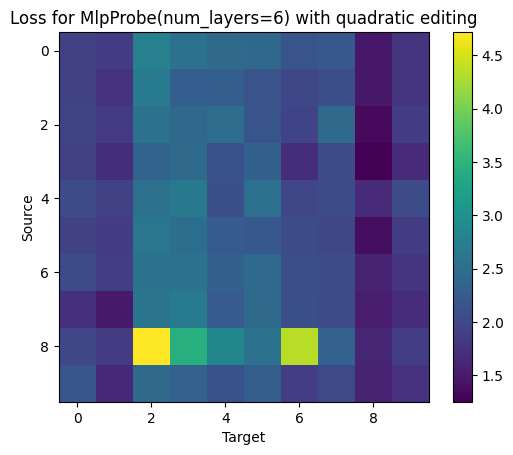

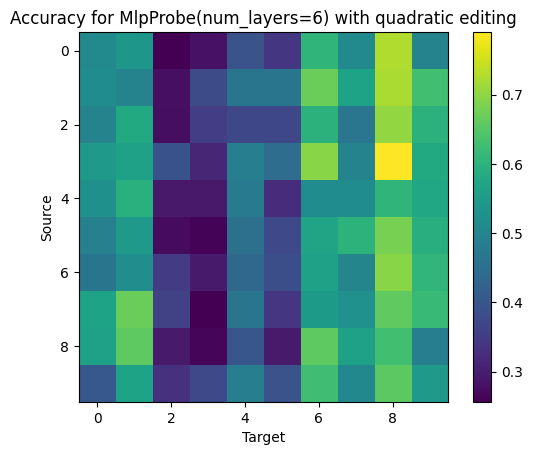

In [2]:

# Plot the loss matrix
plt.imshow(loss_mat)
plt.colorbar()
plt.xlabel("Target")
plt.ylabel("Source")
plt.title(f"Loss for {row['model']} with {row['editing_mode']} editing")

plt.show()

# Plot the accuracy matrix
plt.imshow(acc_mat)
plt.colorbar()
plt.xlabel("Target")
plt.ylabel("Source")
plt.title(f"Accuracy for {row['model']} with {row['editing_mode']} editing")
plt.show()


In [4]:
latex_df = df[["model", "editing_mode", "top1", "edited_top1_against_source", "edited_top1_against_target"]]
latex_df = latex_df.round(2)
latex_df = latex_df.pivot(index="model", columns="editing_mode")
latex_df = latex_df.rename(columns={"edited_top1_against_source": "Top-1 after editing (against source)", "edited_top1_against_target": "Top-1 after editing (against target)", "top1": "Top-1"})
latex_df.to_latex("../data/latex_table.tex")
# ask chatgpt how to do latex table in ICLR professional way